In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file = pd.read_csv(r'C:\Users\tarun\Downloads\Files\Domestic violence.csv')


In [10]:
print(file.head())

   SL. No  Age Education  Employment   Income Marital status  Violence 
0       1   30  secondary  unemployed       0         married       yes
1       2   47   tertiary  unemployed       0         married        no
2       3   24   tertiary  unemployed       0        unmarred        no
3       4   22   tertiary  unemployed       0        unmarred        no
4       5   50    primary  unemployed       0         married       yes


# AGE

In [11]:
#Age
ages = file['Age']

In [12]:
print(ages.head())

0    30
1    47
2    24
3    22
4    50
Name: Age, dtype: int64


In [14]:
#Average Age
sum_of_ages = 0
for i in range(len(ages)):
    sum_of_ages+= ages[i]
avg_age = sum_of_ages / len(ages)
print(avg_age)

31.380403458213255


In [30]:
# Age Division Count

Teen = 0
Young_adult = 0
Adult = 0
Middle_aged = 0
Senior = 0

for i in range(len(ages)):
    if ages[i]<20:
        Teen+=1
    elif ages[i] >=20 and ages[i] <=30:
        Young_adult+=1
    elif ages[i] >=31 and ages[i] <=40:
        Adult+=1
    elif ages[i] >=41 and ages[i] <=50:
        Middle_aged+=1
    elif ages[i]>50:
        Senior+=1
    else:
        print('Error in Value')

print("Teen:", Teen)
print("Young Adult:", Young_adult)
print("Adult:", Adult)
print("Middle Aged:", Middle_aged)
print("Senior:", Senior)



Teen: 26
Young Adult: 170
Adult: 81
Middle Aged: 63
Senior: 7


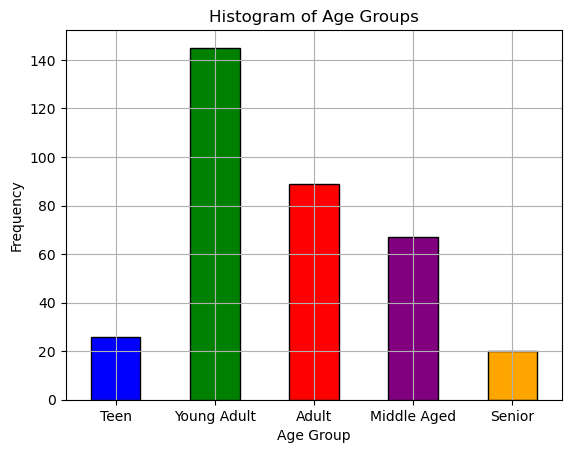

In [28]:
# Age-wise Division - HISTOGRAM

bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
# Categorize ages into bins
file['age_group'] = pd.cut(file['Age'], bins=bins, labels=labels, right=False)

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting the histogram

file['age_group'].value_counts(sort=False).plot(kind='bar', edgecolor='black', color = colors)
plt.title('Histogram of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(True)
plt.show()

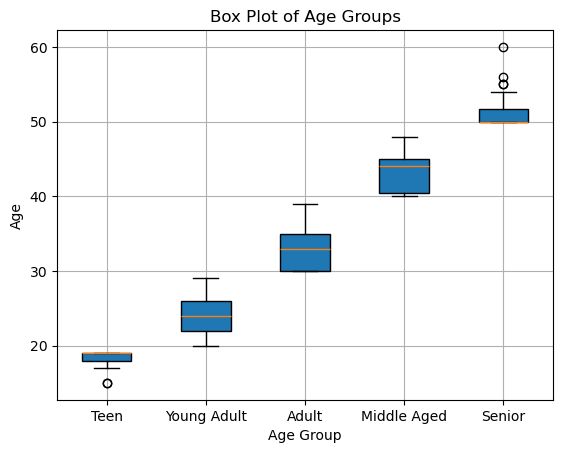

In [39]:
# Age-wise Division - BOXPLOT

bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
# Categorize ages into bins
file['age_group'] = pd.cut(file['Age'], bins=bins, labels=labels, right=False)


# Plotting the boxplot
plt.boxplot([file[file['age_group'] == label]['Age'] for label in labels], labels=labels, patch_artist=True)
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.title('Box Plot of Age Groups')
plt.grid(True)
plt.show()

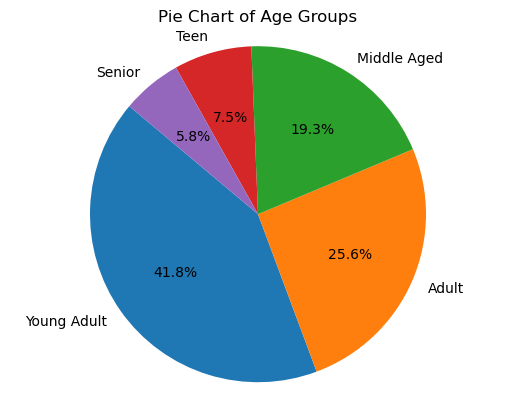

In [45]:
# Age-wise Division - Piechart

bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
# Categorize ages into bins
file['age_group'] = pd.cut(file['Age'], bins=bins, labels=labels, right=False)


# Calculate the counts or proportions of each age group
age_group_counts = file['age_group'].value_counts()

# Plotting the Pie chart
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Education

In [202]:
# Making a single array of education

# print(file.columns)

edu = file['Education']
print(edu.head())

no_of_uniques = edu.nunique()
uniques = edu.unique()
print(no_of_uniques)
print(uniques)

edu_dict = {}
for item in uniques:
    edu_dict[item] = 0

# print(edu_dict)

for item in edu:
    edu_dict[item]+=1

print(edu_dict)

label = ['none', 'primary', 'secondary', 'tertiary']
label_perc = [0 for _ in range(len(edu_dict))]
# print(label_perc)

for i in range(len(label)):
    label_perc[i] = (edu_dict[label[i]] / len(edu))*100
# print(label_perc)

for  i in range(len(label_perc)):
    print(label[i], ":", round(label_perc[i], 2), "%")

0    secondary
1     tertiary
2     tertiary
3     tertiary
4      primary
Name: Education, dtype: object
4
['secondary' 'tertiary' 'primary' 'none']
{'secondary': 114, 'tertiary': 49, 'primary': 132, 'none': 52}
none : 14.99 %
primary : 38.04 %
secondary : 32.85 %
tertiary : 14.12 %


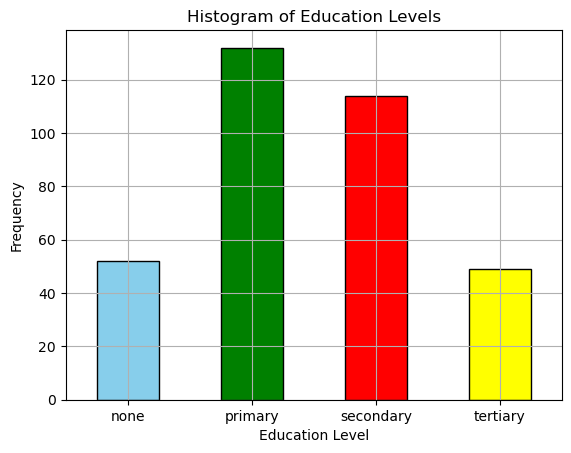

In [82]:
edu_counts = edu.value_counts()
# print(edu_counts)

# Calculate percentages
edu_percentages = (edu_counts / len(edu)) * 100

#colors
colors = ['skyblue', 'green', 'red', 'yellow']

# Plotting the histogram

edu_counts.sort_index().plot(kind='bar', edgecolor='black', color=colors)
plt.title('Histogram of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



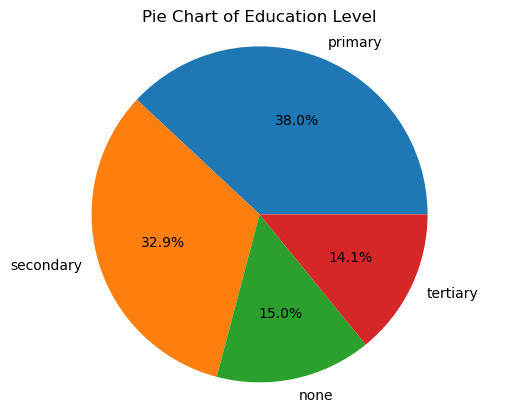

In [132]:
# Plotting the piechart

plt.pie(edu_counts, labels = edu_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Education Level')
plt.axis('equal')
plt.show()

# Employment   

In [124]:
# Employ statistics

employ = file['Employment'].str.strip()  # Remove trailing spaces from the 'Employment' column values

In [131]:
# Calculate the count of each employment status
employ_count = employ.value_counts()
print("Employment Status Counts:\n", employ_count)

# Calculate the percentage distribution of each employment status
employ_perc = (employ_count / len(employ)) * 100
print("Employment Status Percentages:", employ_perc)

# Print the number of unique employment statuses
print("\nNumber of unique employment statuses:", employ.nunique())

Employment Status Counts:
 Employment
unemployed       274
semi employed     47
employed          26
Name: count, dtype: int64
Employment Status Percentages: Employment
unemployed       78.962536
semi employed    13.544669
employed          7.492795
Name: count, dtype: float64

Number of unique employment statuses: 3


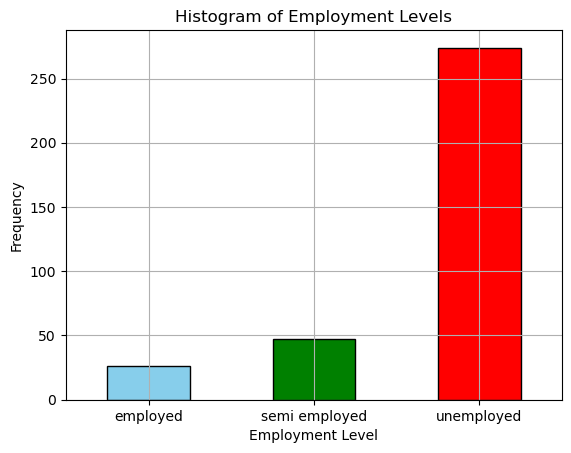

In [199]:
#colors
colors = ['skyblue', 'green', 'red', 'yellow']

# Plotting the histogram

employ_count.sort_index().plot(kind='bar', edgecolor='black', color=colors)
plt.title('Histogram of Employment Levels')
plt.xlabel('Employment Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

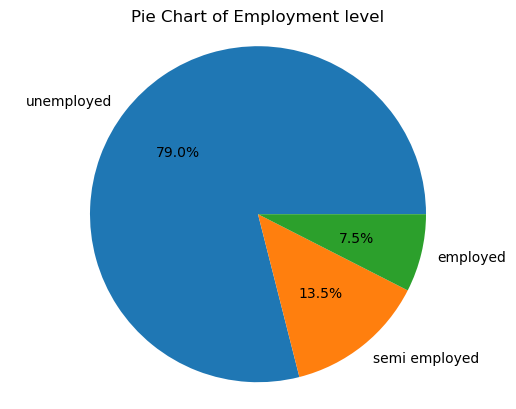

In [133]:
# Plotting the piechart

plt.pie(employ_count, labels = employ_count.index, autopct='%1.1f%%')
plt.title('Pie Chart of Employment level')
plt.axis('equal')
plt.show()

# INCOME

In [135]:
incomes=  file['Income']
print(incomes)

0          0
1          0
2          0
3          0
4          0
       ...  
342    30000
343    35000
344        0
345        0
346        0
Name: Income, Length: 347, dtype: int64


In [143]:
# Avg Income

sum_income = 0
for i in range(len(incomes)):
    sum_income+= incomes[i]

#print(sum_income)
avg_income = sum_income / len(incomes)
#print(avg_income)

print("The Average income is: Rs", avg_income)

The Average income is: Rs 2110.685878962536


In [146]:
# Income Range
less_than_1k = 0
between_1k_and_10k = 0
between_10k_and_20k = 0
greater_than_20k = 0

# Iterate through the list of incomes
for income in incomes:
    if income <= 1000:
        less_than_1k += 1
    elif 1000 < income < 10000:
        between_1k_and_10k += 1
    elif 10000 <= income < 20000:
        between_10k_and_20k += 1
    elif income >= 20000:
        greater_than_20k += 1
    else:
        print("Error with income:", income)

# Print the results
print("Income less than 1000:", less_than_1k)
print("Income between 1000 and 10000:", between_1k_and_10k)
print("Income between 10000 and 20000:", between_10k_and_20k)
print("Income greater than 20000:", greater_than_20k)


Income less than 1000: 275
Income between 1000 and 10000: 45
Income between 10000 and 20000: 11
Income greater than 20000: 16


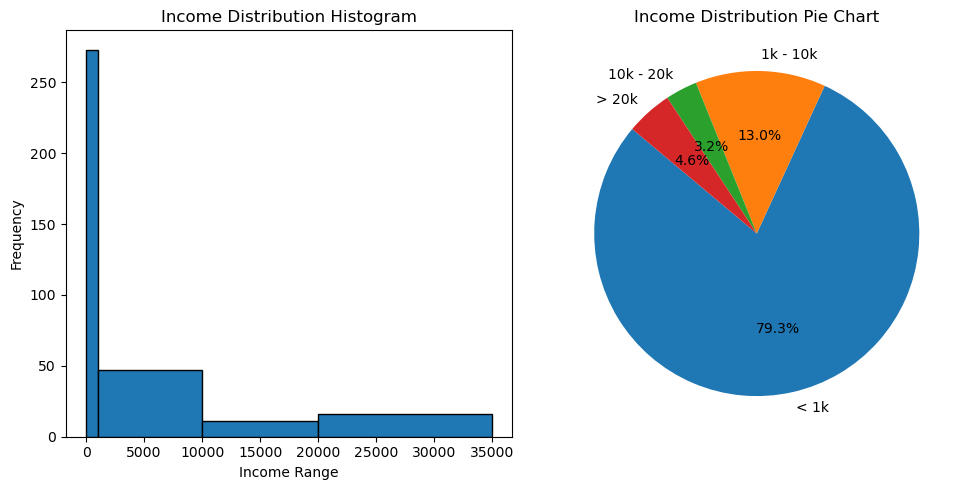

In [150]:
# Data for plotting
labels = ['< 1k', '1k - 10k', '10k - 20k', '> 20k']
counts = [less_than_1k, between_1k_and_10k, between_10k_and_20k, greater_than_20k]

colors = ['skyblue', 'green', 'red', 'yellow']

# Plotting the histogram
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(incomes, bins=[0, 1000, 10000, 20000, max(incomes)+1], edgecolor='black')
plt.title('Income Distribution Histogram')
plt.xlabel('Income Range')
plt.ylabel('Frequency')

# Plotting the pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution Pie Chart')

plt.tight_layout()
plt.show()

# Martial Status

In [172]:
# Martial Status

# correcting spelling in our dataset
file['Marital status'] = file['Marital status'].replace('unmarred', 'unmarried')

martial_status = file['Marital status']
print(martial_status.head())

0      married
1      married
2    unmarried
3    unmarried
4      married
Name: Marital status, dtype: object


In [168]:
martial_status_counts = martial_status.value_counts()
print(martial_status_counts)

print(martial_status_counts.nunique())

Marital status
married      300
unmarried     47
Name: count, dtype: int64
2


In [169]:
martial_status_perc = (martial_status_counts / len(martial_status))*100
print(martial_status_perc)

Marital status
married      86.455331
unmarried    13.544669
Name: count, dtype: float64


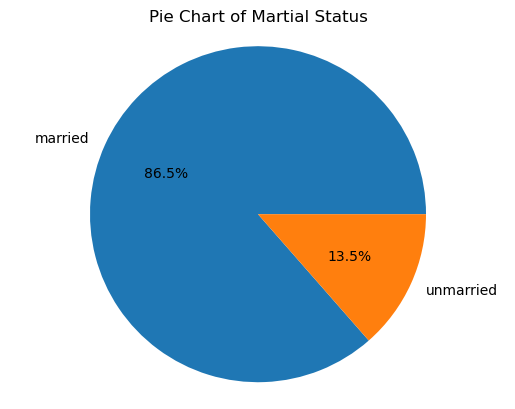

In [170]:
# Visualisation - Piechart

plt.pie(martial_status_counts, labels = martial_status_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Martial Status')
plt.axis('equal')
plt.show()

# Violence

In [203]:
# Violence

violence = file['Violence']
print(violence.head())

0    yes
1     no
2     no
3     no
4    yes
Name: Violence, dtype: object


In [180]:
print(violence.nunique())
print(violence.unique())

2
['yes' 'no']


In [182]:
violence_counts = violence.value_counts()
print(violence_counts)

Violence
no     261
yes     86
Name: count, dtype: int64


In [187]:
violence_perc = (violence_counts / len(violence))*100
print(round(violence_perc,2))

Violence
no     75.22
yes    24.78
Name: count, dtype: float64


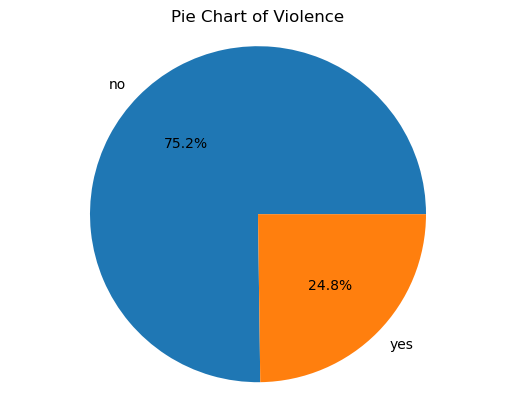

In [188]:
# Visualisation - Piechart

plt.pie(violence_counts, labels = violence_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Violence')
plt.axis('equal')
plt.show()

# How many teenagers are facing violence?

In [197]:
total_teens = Teen
# print(Teen)

teens_violence = 0

for i in range(len(ages)):
    if ages[i] < 20 and violence[i]=='yes':
      teens_violence+=1

# print(teens_violence)
print('There are', teens_violence, 'out of', total_teens, 'facing violence.')

teens_violence_perc = (teens_violence/total_teens)*100
print('Approximately', round(teens_violence_perc,2), '% teens are facing ciolence')

There are 4 out of 26 facing violence.
Approximately 15.38 % teens are facing ciolence


# How many womens are educated but unemployed and facing violence?

In [211]:
# edu, employ and violence

total_womens_educated = 0
total_women = len(edu)
total_women_educated_unemployed = 0
total_women_educated_unemployed_facing_violence = 0

# print(total_women)

for i in range(len(edu)):
    if edu[i]!='none':
        total_womens_educated+=1
        if employ[i]=='unemployed':
            total_women_educated_unemployed+=1
            if violence[i]=='yes':
                total_women_educated_unemployed_facing_violence+=1
        


print('Total no. of women are:', total_women)
print('Total no. of educated women are:', total_womens_educated)
print('Total no. of educated but unemployed women are:', total_women_educated_unemployed)
print('Total no. of educated, unemployed women facing violence are:', total_women_educated_unemployed_facing_violence)

Total no. of women are: 347
Total no. of educated women are: 295
Total no. of educated but unemployed women are: 231
Total no. of educated, unemployed women facing violence are: 65


# Total number of illiterate womens facing violence?

In [215]:
# edu and violence

total_illiterate_womens = 0
total_illiterate_womens_facing_violence = 0

for i in range(len(edu)):
    if edu[i] == 'none':
        total_illiterate_womens+=1
        if violence[i] == 'yes':
            total_illiterate_womens_facing_violence+=1

print('Total number of illiterate womens are: ',total_illiterate_womens)
print('Total number of illiterate womens facing violence are: ',total_illiterate_womens_facing_violence)

total_illiterate_womens_facing_violence_perc = (total_illiterate_womens_facing_violence / total_illiterate_womens)*100

print('Approximately', round(total_illiterate_womens_facing_violence_perc,2), '% illiterate womens are facing violence')

Total number of illiterate womens are:  52
Total number of illiterate womens facing violence are:  11
Approximately 21.15 % illiterate womens are facing violence


# Married unemployed womens facing violence?

In [217]:
# martial_status, violence & employ

total_married = 0
total_married_unemployed = 0
total_married_unemployed_facing_violence = 0

for i in range(len(martial_status)):
    if martial_status[i] == 'married':
        total_married += 1
        if employ[i] == 'unemployed':
            total_married_unemployed += 1
            if violence[i] == 'yes':
                total_married_unemployed_facing_violence += 1

print("Total married:", total_married)
print("Total married unemployed:", total_married_unemployed)
print("Total married unemployed facing violence:", total_married_unemployed_facing_violence)


Total married: 300
Total married unemployed: 240
Total married unemployed facing violence: 72


# Unmarried unemployed womens facing violence?




In [218]:
total_unmarried = 0
total_unmarried_unemployed = 0
total_unmarried_unemployed_facing_violence = 0

# Calculate the counts
for i in range(len(martial_status)):
    if martial_status[i] != 'married':
        total_unmarried += 1
        if employ[i] == 'unemployed':
            total_unmarried_unemployed += 1
            if violence[i] == 'yes':
                total_unmarried_unemployed_facing_violence += 1

# Print the results
print("Total unmarried:", total_unmarried)
print("Total unmarried unemployed:", total_unmarried_unemployed)
print("Total unmarried unemployed facing violence:", total_unmarried_unemployed_facing_violence)

Total unmarried: 47
Total unmarried unemployed: 34
Total unmarried unemployed facing violence: 3
